<a href="https://colab.research.google.com/github/VDK-150202/Assignment-submission/blob/main/brain_tumor_classifier_11_july_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import warnings
warnings.filterwarnings(action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [6]:
datadir = "/content/drive/MyDrive/brain_tumor_dataset"
categories = ["no","yes"]

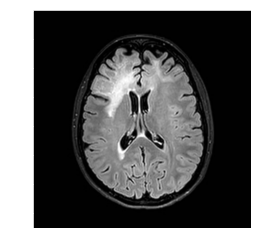

In [7]:
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


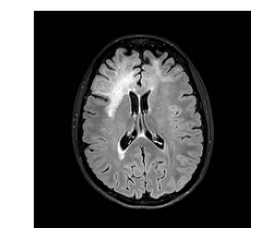

In [9]:
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [10]:
training_data = []
def creat_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
creat_training_data()

In [11]:
print(len(training_data))

269


In [12]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
0
0
1
1
0


In [14]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
y = np.array(y) 
print(X[:1])
len(X)

[array([[17, 17, 16, ..., 17, 17, 17],
       [ 0,  1,  1, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8)]


269

In [15]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(X.shape)

(269, 200, 200, 1)


In [16]:
X = X/255.

In [17]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.08)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.08)

In [18]:
X_train.shape, X_test.shape, X_valid.shape

((227, 200, 200, 1), (22, 200, 200, 1), (20, 200, 200, 1))

In [19]:
from keras import layers, models

In [20]:
model = models.Sequential()

In [21]:
model.add(layers.Conv2D(64, (2,2), activation = "relu", input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (2,2), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 49, 49, 128)       0

In [23]:
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics  = ["acc"])

In [24]:
checkpoint = keras.callbacks.ModelCheckpoint("Best_1.h5",save_best_only=True)

In [25]:
history = model.fit(X_train,y_train, epochs=10, shuffle=True, validation_data=(X_valid,y_valid),callbacks=[checkpoint])

Epoch 1/10
8/8 [==============================] - 38s 5s/step - loss: 1.9636 - acc: 0.5991 - val_loss: 0.6309 - val_acc: 0.8000
Epoch 2/10
8/8 [==============================] - 28s 3s/step - loss: 0.6850 - acc: 0.6167 - val_loss: 0.6748 - val_acc: 0.5000
Epoch 3/10
8/8 [==============================] - 28s 3s/step - loss: 0.6252 - acc: 0.6740 - val_loss: 0.6722 - val_acc: 0.6000
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.5681 - acc: 0.7797 - val_loss: 0.6047 - val_acc: 0.6500
Epoch 5/10
8/8 [==============================] - 36s 5s/step - loss: 0.5040 - acc: 0.7665 - val_loss: 0.5422 - val_acc: 0.7000
Epoch 6/10
8/8 [==============================] - 28s 3s/step - loss: 0.4432 - acc: 0.8018 - val_loss: 0.5513 - val_acc: 0.6500
Epoch 7/10
8/8 [==============================] - 35s 4s/step - loss: 0.3844 - acc: 0.8502 - val_loss: 0.5350 - val_acc: 0.6000
Epoch 8/10
8/8 [==============================] - 28s 3s/step - loss: 0.2965 - acc: 0.8767 - val_loss: 0

In [26]:
model1 = models.load_model("Best_1.h5")

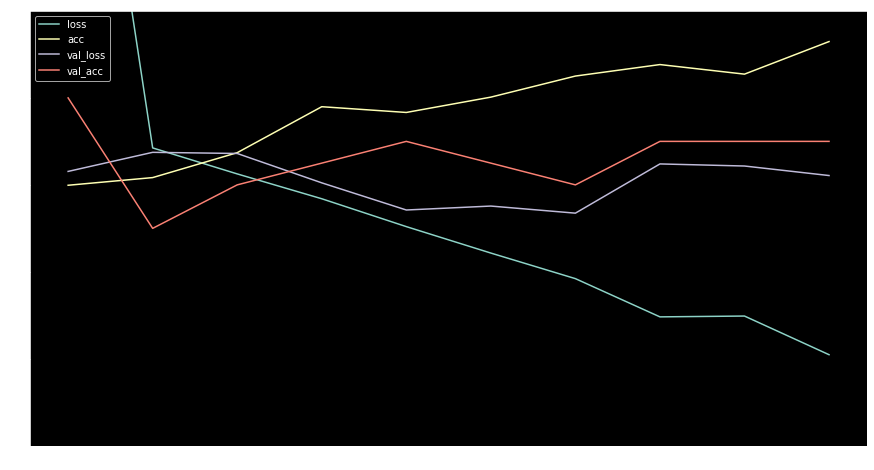

In [27]:
pd.DataFrame(history.history).plot(figsize = (15,8))
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
accuracy = model1.evaluate(X_test,y_test)
accuracy[1]

1/1 [==============================] - 1s 644ms/step - loss: 0.4541 - acc: 0.9091


0.9090909361839294

In [29]:
pred = (model1.predict(X_test) > 0.5).astype("int32")

In [30]:
from sklearn.metrics import confusion_matrix

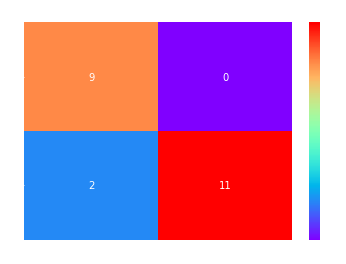

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred), annot = True, cmap = "rainbow")
plt.title("Confusion Matrix")
plt.show()